# Семинар 2
## Вычислительная линейная алгебра

In [ ]:
# Импортируем все библиотеки, которые нам сегодня понадобятся
import os

import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [ ]:
# Настроим библиотеки отрисовки
%matplotlib inline

sns.set(font_scale=1.3)

red   = '#FF3300'
blue  = '#0099CC'
green = '#00CC66'

На этом занятии мы:
* Вспомним как работать с векторами и матрицами в numpy
* Посмотрим как пользоваться SVD разложением
* Посмотрим как пользоваться PCA
* Применим PCA для сжатия изображения
* Применим PCA в задаче классификации для уменьшения размера признакового пространства

## 0. Работа с матрицами

In [ ]:
# Создадим при помощи numpy две матрицы 2х2, одну матрицу 2х3 и два вектора длины 2 и один вектор длин 3 с произвольными числами

A = np.array([[1,2],
              [3,-4]])
B = np.array([[2, 0],
              [0, 1]])
C = np.array([[1, -2, 0],
              [3, 0, -1]])

x = np.array([1, -1])
y = np.array([2, 1])
z = np.array([1, 4, 2])

### Умножение матриц и векторов

In [ ]:
# Посчитаем что получится при поэлементном умножении матриц A и B (*)

print(A * B)

[[ 2  0]
 [ 0 -4]]


In [ ]:
# Посчитаем что получится при математическом умножении матриц A и B (@ или np.dot)

print(A @ B)

[[ 2  2]
 [ 6 -4]]


In [ ]:
# Посчитаем что получится при математическом умножении матриц A и C (@ или np.dot)

print(A @ C)

[[ 7 -2 -2]
 [-9 -6  4]]


In [ ]:
# Получится ли умножить матрицу C на матрицу A?

#print(C @ A) #не получится

In [ ]:
# Умножим матрицу A на вектор x справа и слева математически (@ или np.dot)

print(A @ x)
print(x @ A)

[-1  7]
[-2  6]


In [ ]:
# Умножим матрицу C на вектор z справа математически (@ или np.dot)

print(C @ z)

# Получится ли у нас умножить слева?
#print(C @ z)

[-7  1]


In [ ]:
# Умножим математически вектор x и y

print(x @ y)

1


In [ ]:
# Если хочется еще что-то поумножать, то можем попрактиковаться:)
...

### Полезные матрицы

In [ ]:
# Единичная матрица (np.eye)
print(np.eye(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
# Матрица из единиц (np.ones)

print(np.ones(3))

[1. 1. 1.]


In [ ]:
# Матрица из нулей (np.zeros)

print(np.zeros(3))

[0. 0. 0.]


In [ ]:
# Диагональная матрица (np.diag)

print(np.diag([1,1,1]))

[[1 0 0]
 [0 1 0]
 [0 0 1]]


### Полезные функции

In [ ]:
# Определитель [применим на матрицы A и B] (np.linalg.det)

print(np.linalg.det(A))
print(np.linalg.det(B))

# Что если применить на матрице C
#print(np.linalg.det(C)) #будет ошибка

-10.000000000000002
2.0


In [ ]:
# Собственные вектора и значения [применим на матрицу B] (np.linalg.eigh)
print(np.linalg.eigh(B)[0], '\n\n', np.linalg.eigh(B)[1])

# Можно ли применить на матрицу C?
# print(np.linalg.eigh(C)) # Нельзя

[1. 2.] 

 [[0. 1.]
 [1. 0.]]


In [ ]:
# Обратная матрица [применим на матрицы A и B] (np.linalg.inv)

print(np.linalg.inv(A))
print(np.linalg.inv(B))

[[ 0.4  0.2]
 [ 0.3 -0.1]]
[[0.5 0. ]
 [0.  1. ]]


In [ ]:
# Проверим, что она действительно обратная. Как мы можем это сделать?
print(np.allclose(A @ np.linalg.inv(A), np.eye(2)))
print(np.allclose(B @ np.linalg.inv(B), np.eye(2)))  # Сравнили с единичной матрицей, почти совпали)))

True
True


## 1. SVD-разложение

Для того, чтобы ручками потрогать SVD разложение, воспользуемся его реализацией в scipy и сгенерированным датасетом.

In [ ]:
# Сгенерируем матрицу размера 100 на 10 из нормального распределения при помощи функции normal модуля random
X = np.random.normal(size=(100, 10))
print(X.shape)

(100, 10)


In [ ]:
# Воспользуемся функцией svd модуля linalg библиотеки scipy для того, чтобы получить svd разложение нашей матрицы X
# У этой функции есть параметр full_matrices, предлагается попробовать оба варианта значения этого параметра, чтобы понять, что он изменяет

U, D, V = sp.linalg.svd(X, full_matrices=False)
print(U.shape, D.shape, V.shape)

(100, 10) (10,) (10, 10)


In [ ]:
# Посмотрим, что из себя представляет матрица D

print(D)

[12.05946192 11.58916791 11.08274537 10.33616992  9.5890652   9.4804823
  8.82920375  8.65798765  7.83940625  7.66294262]


In [ ]:
# Переведем D в матричный вид при помощи умножения на единичную матрицу поэлементно (*)

print(D * np.eye(10))

[[12.05946192  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         11.58916791  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         11.08274537  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         10.33616992  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          9.5890652   0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          9.4804823
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   8.82920375  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          8.65798765  0.          0.        ]
 [ 0.          0.          0.          0.          0.    

In [ ]:
# Проверим, что SVD работает верно, умножив последовательно матрицы U, D и V
X_restored = U @ (D * np.eye(10)) @ V

print(np.allclose(X_restored, X))

True


In [ ]:
0.1 + 0.2

0.30000000000000004

Восстановленная версия действительно очень близка к исходной.

## 2. PCA (Principal component analysis)

### Метод главных компонент

Интерактивная визуализация PCA и собственных векторов:

* <a href="http://setosa.io/ev/principal-component-analysis/">Principal Component Analysis</a>

* <a href="http://setosa.io/ev/eigenvectors-and-eigenvalues/">Eigenvectors and Eigenvalues</a>





Реализация из sklearn:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA">`sklearn.decomposition.PCA`</a>`(n_components=None)`

Методы класса:
* `fit(X)` — обучиться на данных `X`;
* `fit_transform(X)` — обучиться на данных `X` и вернуть сжатое представление `X`;
* `transform(X_new)` — вернуть сжатое представление `X_new` для обученной ранее модели;
* `inverse_transform(Y)` — восстановить сжатые данные `Y` в исходное пространство.

Атрибуты класса:

* `components_` — главные компоненты в порядке убывания собственных чисел, размер (n_components, n_features);
* `explained_variance_` — дисперсия вдоль главных компонент, равны собственным числам, размер (n_components,);
* `explained_variance_ratio_` —- доля дисперсии, объясняемая каждой компонентой, размер (n_components,);
* `mean_` — среднее по данным, размер (n_components,);
* `noise_variance_` — оценка дисперсии шума для метода Probabilistic PCA.

Другие модификации, реализованные в sklearn:

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA">`KernelPCA`</a>;
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA">`SparsePCA`</a>;
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA">`IncrementalPCA`</a>.

Для демонстрации работы PCA сгенерируем двумерный датасет из нормального распределения.

In [ ]:
# Сгенерируем двухмерный датасет при помощи функции multivariate_normal из модуля random библиотеки numpy
# Например, размера 150, со средними [0,3] и ковариацией [[3, 1], [1, 1]]

X = np.random.multivariate_normal(size=150, mean=[0, 3], cov=[[3, 1], [1, 1]])

Почему мы просто не воспользовались `np.random.normal`, как в прошлом примере?

In [ ]:
# Посмотрим, что матрица того размера, который мы предполагали
X.shape

(150, 2)

In [ ]:
# Создадим объект класса PCA с числом компонент, равным 1
pca = PCA(n_components=1)

In [ ]:
# Обучим и преобразуем нашу матрицу X при помощи метода fit_transform
Y = pca.fit_transform(X)

In [ ]:
Y

array([[-0.31491027],
       [-0.79025207],
       [-0.6318975 ],
       [-1.56031562],
       [-1.73578004],
       [-0.99536636],
       [-0.53431061],
       [-4.02223918],
       [ 2.1691798 ],
       [ 0.21695874],
       [ 0.38565515],
       [-0.25089976],
       [ 0.11131449],
       [-1.87816252],
       [-0.50008297],
       [-1.85095568],
       [ 0.32600447],
       [ 1.52526169],
       [ 0.2867286 ],
       [ 0.51813665],
       [-0.17113272],
       [ 1.30901603],
       [-1.75746456],
       [-0.22877207],
       [-2.42664367],
       [-1.55526466],
       [-0.92870918],
       [ 4.32714535],
       [-0.63467118],
       [-3.57875038],
       [-0.05615828],
       [ 0.80685037],
       [ 0.74218995],
       [-3.60804105],
       [ 1.44610114],
       [ 1.87538504],
       [ 2.67938017],
       [-2.01635239],
       [ 0.3583355 ],
       [ 2.65363285],
       [ 3.06710106],
       [ 0.38134919],
       [ 0.0063505 ],
       [-0.68630047],
       [ 0.45475801],
       [ 1

In [ ]:
# Преобразуем наши данные в исходнрый размер при помощи метода inverse_transform
# Это можно понять следующий образом: если SVD возвращает U, S, V и U@S -- это PCA преобразование
# То множение еще и на V, то это обратное преобразование

X_hat = pca.inverse_transform(Y)

In [ ]:
X_hat

array([[ 0.18512689,  3.0901749 ],
       [ 0.62516362,  3.26994559],
       [ 0.47857052,  3.21005709],
       [ 1.33803223,  3.56117783],
       [ 1.50046438,  3.62753715],
       [ 0.81504346,  3.34751827],
       [ 0.3882317 ,  3.17315046],
       [ 3.61710131,  4.49225878],
       [-2.11446233,  2.15071074],
       [-0.30723861,  2.88902605],
       [-0.46340543,  2.82522634],
       [ 0.12587063,  3.06596661],
       [-0.20944087,  2.92897991],
       [ 1.63227169,  3.68138513],
       [ 0.35654625,  3.16020582],
       [ 1.60708558,  3.67109571],
       [-0.40818519,  2.84778577],
       [-1.51836996,  2.39423573],
       [-0.37182645,  2.86263961],
       [-0.58604713,  2.77512283],
       [ 0.05202813,  3.03579932],
       [-1.31818551,  2.47601821],
       [ 1.52053833,  3.63573807],
       [ 0.10538644,  3.05759808],
       [ 2.14001549,  3.88881657],
       [ 1.33335643,  3.55926759],
       [ 0.75333711,  3.32230903],
       [-4.11214928,  1.33458443],
       [ 0.4811382 ,

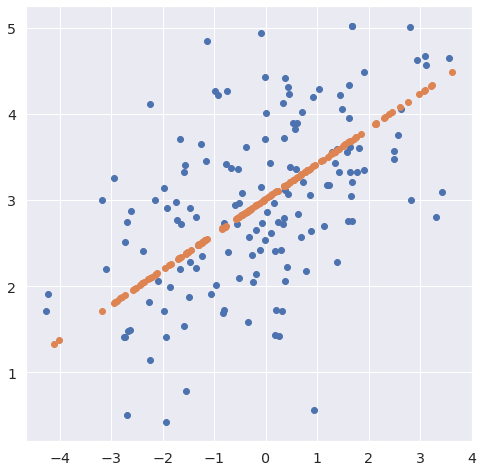

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_hat[:, 0], X_hat[:, 1])

In [ ]:
# Выведем размеры матриц X, Y и X_hat
print(X.shape)
print(Y.shape)
print(X_hat.shape)

(150, 2)
(150, 1)
(150, 2)


In [ ]:
# Посмотрим на главные компоненты (точнее, одну компоненту) при помощи переменную components_
pca.components_

array([[-0.92572699, -0.37819247]])

In [ ]:
# Посомтрим на вектор средних, вызвав переменную mean_
pca.mean_

array([-0.10639405,  2.97107821])

Построим следующие графики: 
* На первом графике синим отмечены исходные точки, красным - они же после проецирования и обратного преобразования.

* На втором графике точки, спроецированные на главную компоненту в одномерном пространстве. Иными словами распределение точек вдоль главной компоненты.

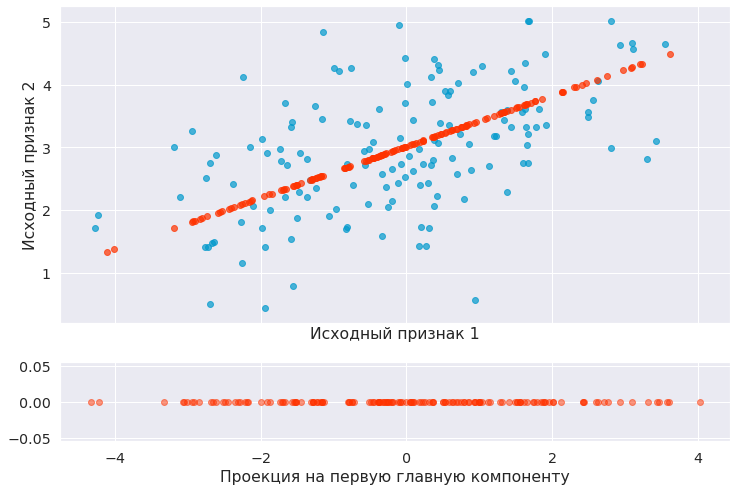

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

# Отрисуем точки, поспользовавшись первой колонкой матрицы X как координатами точек по оси х
# и второй колонкой как координатами точек по оси y
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.7, color=blue)
# Аналогично с преобразованной матрицей X_hat
axes[0].scatter(X_hat[:, 0], X_hat[:, 1], color=red, alpha=0.7)

axes[0].set_xlabel('Исходный признак 1')
axes[0].set_ylabel('Исходный признак 2')

# Отрисуем распределения точек вдоль главной компоненты, передав в качестве координат по оси x вектор -Y
# (подумайте почему в нашем случае -Y, а не Y. Подсказка -- посмотрите на главную компоненту),
# а в качестве координат по оси y нули
axes[1].scatter(-Y, np.zeros(len(Y)), alpha=0.5, color=red)

axes[1].set_xlabel('Проекция на первую главную компоненту')

plt.show()

Другие методы снижения размерности:

* http://scikit-learn.org/stable/modules/manifold.html#manifold

Примеры с визуализацией:

* http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py

* http://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html#sphx-glr-auto-examples-manifold-plot-manifold-sphere-py

## 3. Cжатие изображений с помощью PCA

In [ ]:
# Скачаем картинку
! wget https://www.dropbox.com/s/ehhrw5l46rpnv61/3840x2400.png

--2023-02-02 10:55:07--  https://www.dropbox.com/s/ehhrw5l46rpnv61/3840x2400.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ehhrw5l46rpnv61/3840x2400.png [following]
--2023-02-02 10:55:08--  https://www.dropbox.com/s/raw/ehhrw5l46rpnv61/3840x2400.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc95bda83bb866bca0217dd10ef.dl.dropboxusercontent.com/cd/0/inline/B1vQ1jvo5J8TnHB8YUS_lvTR5cfHl3SDzhtgGaMT7wC5N4EW5Y8u_Cq8Q2P_YSC3thJvoob3ZFSgGAcqhxQ7wE3BNklfTGTuM9GAiT5KbzM16M-cYI5_AHgaMWd5N1w25ccLcBdhsQVEx93kqapr9Kfs2lUljGlpg5tYHAMvwOtLsw/file# [following]
--2023-02-02 10:55:08--  https://ucc95bda83bb866bca0217dd10ef.dl.dropboxusercontent.com/cd/0/inline/B1vQ1jvo5J8TnHB8YUS_lvTR5cfHl3SDzhtgGaMT7wC5N4EW5Y8u_Cq8Q2P_YSC3thJvoob3ZFSgG

In [ ]:
# Считаем картинку при помощи функции imread библиотеки matplotlib
image = plt.imread('3840x2400.png')

In [ ]:
# Посмотрим какой размер изображения. За что отвечает каждая размерность?
image.shape

(2400, 3840, 3)

In [ ]:
# Посмотрим что из себя представляет image
image

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

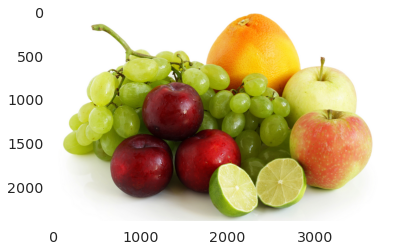

In [ ]:
# Отрисуем картику при помощи функции imshow библиотеки matplotlib
plt.imshow(image)
plt.grid(False)

**Что предлагается сделать:**

Давайте разобьем наше изображение на 24 равных кусочка (нарежем изображение на равные части). 

Применим к картинке преобразования для выделения 24 блоков размера 600x640. То есть из массива `(2400, 3840, 3)` сделаем массивом `(24, 600, 640, 3)`, чтобы потом каждый кусочек растянуть в один вектор, то есть получить массив `(24, 600 * 640 * 3)`

Для этого мы будем использовать простую логику: если мы хотим разделить какую-то размерность(например из 2400 сделать 4 и 600), то мы должны перенести ее в конец, а если мы хотим соединить две размерности (из 4 и 600 сделать 2400), то мы также должны перенести их обе в конец друг за другом.

Для этого нам нужны две функции:
* Для переноса размерностей используют метод `transpose(<на какую позицию переместить нулевую размерность>, <на какую позицию переместить первую размерность>, и т.д.)`;
* Для склейки и разделения размерностей используют метод `reshape(<новый размер>)`.

In [ ]:
# Размерность изначального изображения
image.shape

(2400, 3840, 3)

In [ ]:
# Размерность после перестановки нулевой оси на первую позицию, первой на вторую, а вторую на нулевую
image.transpose((1, 2, 0))\
    .shape

(3840, 3, 2400)

In [ ]:
# Разбиваем высоту и посмотрим размерность
image.transpose((1, 2, 0))\
    .reshape((3840, 3, 4, 600))\
    .shape 

(3840, 3, 4, 600)

In [ ]:
# Переставляем размерности, чтобы разбить ширину и смотрим размерность
image.transpose((1, 2, 0))\
    .reshape((3840, 3, 4, 600))\
    .transpose((1, 2, 3, 0))\
    .shape 

(3, 4, 600, 3840)

In [ ]:
# Разбиваем ширину и смотрим размерность
image.transpose((1, 2, 0))\
    .reshape((3840, 3, 4, 600))\
    .transpose((1, 2, 3, 0))\
    .reshape((3, 4, 600, 6, 640))\
    .shape 

(3, 4, 600, 6, 640)

In [ ]:
# Переставляем размерности, чтобы схлопнуть размерности
image.transpose((1, 2, 0))\
    .reshape((3840, 3, 4, 600))\
    .transpose((1, 2, 3, 0))\
    .reshape((3, 4, 600, 6, 640))\
    .transpose((1, 3, 2, 4, 0))\
    .shape 

(4, 6, 600, 640, 3)

In [ ]:
# И наконец склеиваем размерности, чтобы получить 24 строки и смотрим какие получились размерности
image.transpose((1, 2, 0))\
    .reshape((3840, 3, 4, 600))\
    .transpose((1, 2, 3, 0))\
    .reshape((3, 4, 600, 6, 640))\
    .transpose((1, 3, 2, 4, 0))\
    .reshape((4 * 6, 600 * 640 * 3))\
    .shape 

(24, 1152000)

Ура, мы справились с этой довольно сложной задачей! Давайте теперь соберем все вместе.

In [ ]:
# Итого:
X = image.transpose((1, 2, 0))\
    .reshape((3840, 3, 4, 600))\
    .transpose((1, 2, 3, 0))\
    .reshape((3, 4, 600, 6, 640))\
    .transpose((1, 3, 2, 4, 0))\
    .reshape((4 * 6, 600 * 640 * 3))
print(X.shape)
# На самом деле мы получили в некотором смысле матрицу объект-признак для нашего изображения
# Ведь если так подумать, то объектом для картинки является ее кусочек, а признаками какое-то 
# Представление кусочков

(24, 1152000)


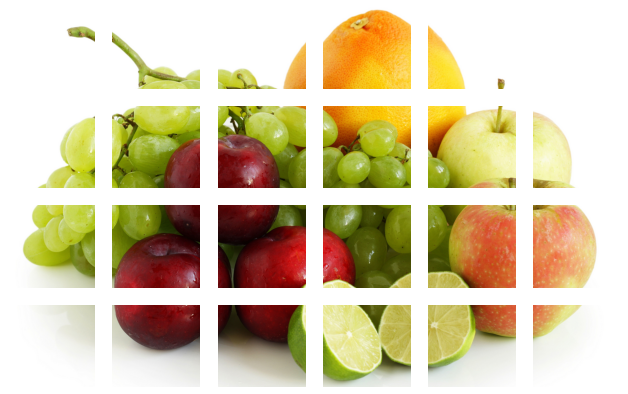

In [ ]:
# Визуализируем получившиеся блоки, чтобы понять, что мы нигде не ошиблись
# Если у нас сложится целая картинка, то все сделано верно

plt.figure(figsize=(11, 7))
for i in range(24):
    plt.subplot(4, 6, i + 1)
    plt.imshow(X[i].reshape((600, 640, 3)))
    plt.axis('off');

# Как видим, все правильно.

Воспользуемся следующими функциями, что исследовать влияние выбора числа главных компонент на качество изображения.

Вспомните -- ведь мы можем выбрать число компонент (тем самым усекая матрицы в SVD разложении), которые хотим оставить и потом возвращаться в исходные размеры, домножая на третью усеченую матрицу в SVD разложении.

In [ ]:
# Итак, посмотрим, что делают предложенные функции
def draw_components(pca, n, m):
    """
    Функция отрисовывает главные компоненты по обученной PCA модели

    pca - обученная PCA модель
    n - количество горизонтальных блоков картинки
    m - количество вертикальных блоков картинки
    """
    print('Среднее изображение')
    plt.figure(figsize=(1, 1))
    plt.imshow(pca.mean_.reshape((n, m, 3)), cmap='gray')
    plt.axis('off')
    plt.show()

    print('Главные компоненты')
    plt.figure(figsize=(11, len(pca.components_) // 10 + 1))
    for i, comp in enumerate(pca.components_):
        plt.subplot(len(pca.components_) // 10 + 1, 10, i + 1)
        img = pca.components_[i].reshape((n, m, 3))
        plt.imshow((img - img.min()) / (img.max() - img.min()), cmap='gray')
        plt.axis('off')
    plt.show()

        
def image_pca(image, n, m, n_components=20, draw_picture=True, 
              draw_comp=True, visualization=True):
    """
    Функция сжимает изображение согласно заданному числу главных компонент, а затем 
    возвращает в исходный вид и рисует результат.

    image - исходаня картинка
    n - количество горизонтальных блоков картинки
    m - количество вертикальных блоков картинки
    n_components - количество главных компонент
    draw_picture - показывать ли исходную картинку
    draw_comp - рисовать ли главные компоненты
    visualization - рисовать ли проекцию на первые три компоненты
    """

    # Показываем исходную картинку
    if draw_picture:
        plt.figure(figsize=(15, 7))
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    print("Размерность оригинальной картинки: ", image.shape)
    
    # Разбиение на блоки
    N, M, K = image.shape
    X = image.transpose((1, 2, 0))\
             .reshape((M, K, N // n, n)) \
             .transpose((1, 2, 3, 0))\
             .reshape((K, N // n, n, M // m, m)) \
             .transpose((1, 3, 2, 4, 0))\
             .reshape((N * M // (n * m), n * m * K))   
    
    # Применение PCA
    pca = PCA(n_components=n_components)
    Y = pca.fit_transform(X)
    X_hat = pca.inverse_transform(Y)
    
    # Разбираемся с интенсивностью цвета
    max_value = X.max()
    X_hat = X_hat * (X_hat <= max_value) + max_value * (X_hat > max_value)
    X_hat = X_hat * (X_hat >= 0)
    
    # Собираем картинку из блоков
    X_hat = X_hat.reshape((N // n, M // m, n, m, K)).transpose((1, 3, 4, 0, 2))\
                 .reshape((M // m, m, K, N)).transpose((3, 2, 0, 1))\
                 .reshape((N, K, M)).transpose((0, 2, 1))
    
    # Рисуем восстановленную картинку
    plt.figure(figsize=(15, 7))
    plt.imshow(X_hat)
    plt.axis('off')
    plt.title('Восстановленное изображение при {} главных компонентах.\n'.format(n_components))
    plt.show()
    print("Размерность сжатой картинки: ", X_hat.shape)
    
    # Если нужно, рисуем главные компоненты 
    if draw_comp:
        draw_components(pca, n, m)
    
    # Визуализируем проекцию на первые три компоненты (третья - цвет)
    if visualization:
        pca = PCA(n_components=3)
        Y = pca.fit_transform(X)
        plt.figure(figsize=(15, 10))
        plt.scatter(Y[:, 0], Y[:, 1], c=Y[:, 2], alpha=0.1)
        plt.xlabel('Проекция на первую главную компоненту')
        plt.ylabel('Проекция на вторую главную компоненту')
        plt.title('Проекция на первые три компоненты (третья - цвет)')
        plt.show()
    plt.imsave('im1.png', image)
    print("Размер оригинального файла", os.path.getsize('im1.png'))

    plt.imsave('im2.png', X_hat)
    print("Размер сжатого файла", os.path.getsize('im2.png'))

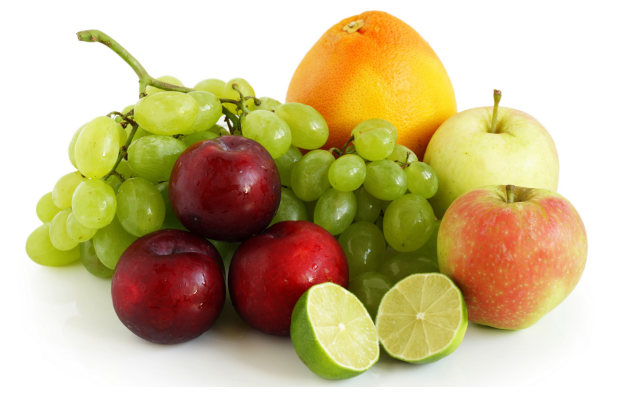

Размерность оригинальной картинки:  (2400, 3840, 3)


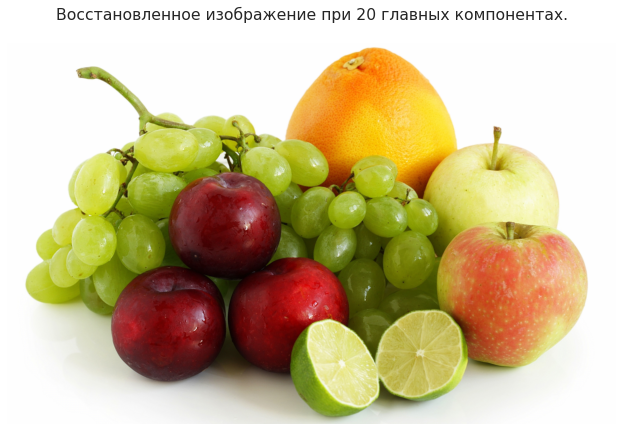

Размерность сжатой картинки:  (2400, 3840, 3)
Среднее изображение


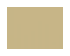

Главные компоненты


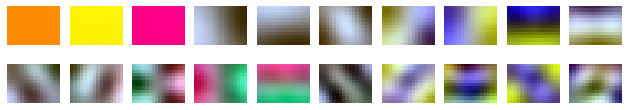

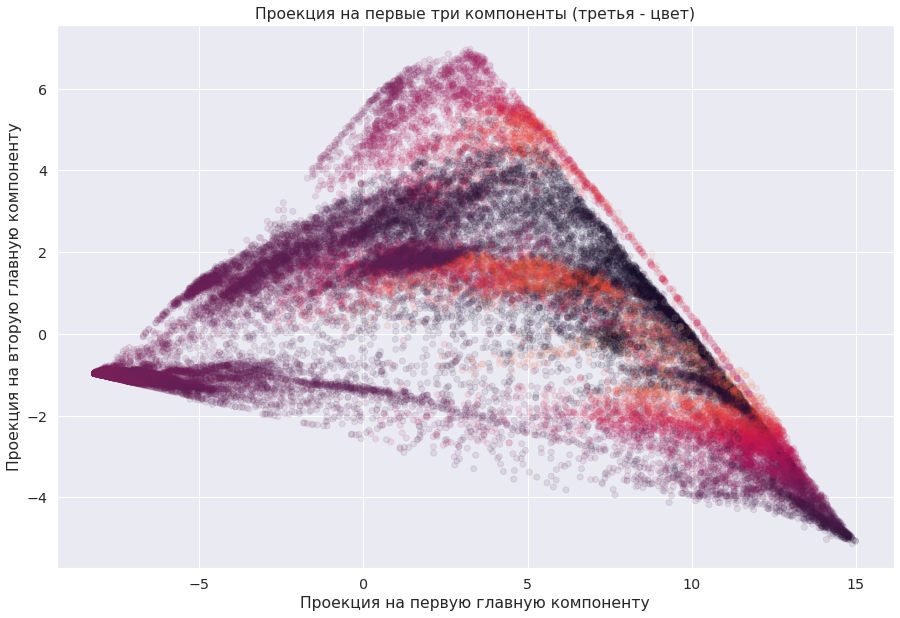

Размер оригинального файла 8176102
Размер сжатого файла 6458942


In [ ]:
# Воспользуемся функцией image_pca и будем разбивать изображение на 12 секций по горизонтали на 16 секций по вертикали
image_pca(image, 12, 16)

In [ ]:
# Посмотрим как будет менять изображение в зависимости от разного числа собственных векторов
for n_components in [15, 10, 5, 4, 3, 2, 1]:
    image_pca(
        image, 12, 16, 
        n_components=n_components, 
        draw_picture=False,
        draw_comp=False, 
        visualization=False
    )

Output hidden; open in https://colab.research.google.com to view.

Вот так можно производить сжатие изображения при помощи PCA.
Но на самом деле это можно делать и со звуком и с видео, ведь все это можно представить как матрицы и от нас требуетсся только править выделить из этих матриц объекты и признаки, чтобы применить PCA!

## 4. PCA для MNIST

Однако PCA нас интересует все же как способ уменьшения размерности данных, а не метод сжатия данных.

Поэтому предлагается применить его для решения задачи классификации на датасете MNIST, который представляет из себя изображения нарисованных от руки цифр и меток, какая именно цифра нарисована. То есть необходимо решить задачу многоклассовой классификации.

In [ ]:
# Скачаем тренировочные данные
! wget https://www.dropbox.com/s/gq1tj9bzj8dkcul/mnist_train.csv

--2023-02-02 09:09:42--  https://www.dropbox.com/s/gq1tj9bzj8dkcul/mnist_train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/gq1tj9bzj8dkcul/mnist_train.csv [following]
--2023-02-02 09:09:43--  https://www.dropbox.com/s/raw/gq1tj9bzj8dkcul/mnist_train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc859853f160fd06190bdf38edda.dl.dropboxusercontent.com/cd/0/inline/B1uNSGRCW_Zp_dQfSrMBELai5vFKn6h1ygtoPkF87ZXyw43gwexLhq_bgJkKm5ySgLWW5nBOOU_uBbGJID3rnSdqPcrEt1bEjWkhZWnw4EiBgWIzAt1NAoL_VI_c3NH4ZE_jApxBgq0ZFKQkKTSNO0oQ6QZvKiTAAITLiBr4bjXDZA/file# [following]
--2023-02-02 09:09:43--  https://uc859853f160fd06190bdf38edda.dl.dropboxusercontent.com/cd/0/inline/B1uNSGRCW_Zp_dQfSrMBELai5vFKn6h1ygtoPkF87ZXyw43gwexLhq_bgJkKm5ySgLWW5nB

In [ ]:
# Загрузим данные mnist_train.csv при помощи функции read_csv библиотеки pandas
mnist_data_all = pd.read_csv('mnist_train.csv')

In [ ]:
# Посмотрим на данные. Что является таргетом и в какой колонке он находится?
mnist_data_all.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Разделим данные на признаки и метки
mnist_label = mnist_data_all['label']
mnist_data = mnist_data_all.drop(columns=['label'])

In [ ]:
# Посмотрим на размер признаков. Почему их именно столько? Как это связано с обещанными картинками?
mnist_data.shape

(60000, 784)

Label:  4


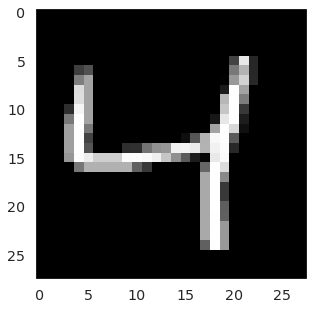

In [ ]:
# Выведем метку какого-нибудь элемента и отрисуем его при помощи функции imshow библиотеки matplotlib
plt.figure(figsize=(6,5))

idx = 2

print("Label: ", mnist_label[idx])

# Необходимо выбрать объект, конвертировать его в numpy, а затем сделать reshape() в нужный размер
grid_data = mnist_data.loc[idx].values.reshape((28, 28))
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.grid(False)
plt.show()

В нашем датасете каждый объект описывается 784 фичами. Как нам одним взглядом посмотреть на весь датасет? 

К нам на помощь опять приходит PCA!

In [ ]:
# Создадим объект класса PCA с числом компонент, равным 2 (чтобы отрисовать точки на плоскости)
pca = PCA(n_components=2)

In [ ]:
# Обучим PCA на наших признаках при помощи метода fit
pca.fit(mnist_data)

PCA(n_components=2)

In [ ]:
# Трансформируем наш датасет в 2d при помощи метода transform
mnist_data_2D = pca.transform(mnist_data)

In [ ]:
# Посмотрим на размер получившегося датасета
mnist_data_2D.shape

(60000, 2)

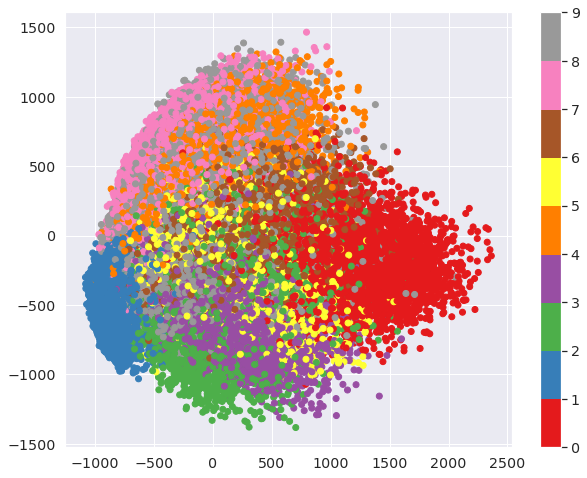

In [ ]:
# Отрисуем точки на плоскости при помощи функции scatter и зададим им цвет согласно их классу передав в аргумент c=mnist_label
plt.figure(figsize=(10,8))

plt.scatter(mnist_data_2D[:, 0], mnist_data_2D[:, 1], c=mnist_label, cmap='Set1')

plt.colorbar()
plt.show()

Зачем нам вообще нужно уменьшать число признаков? Верно, у нас есть проклятье размерности, но что это для нас значит с точки зрения людей, которые работают с данными?

**Проклятие размерности**

Большая размерность приводит к следующим проблемам:

*   Нужно много памяти.
*   Трудоемкие вычисления.
*   Все элементы выборки начинают находится примерно на одинаковом расстоянии друг от друга!



Мы можем продемострировать как большое число (зачастую шумовых) признаков влияет на работу алгорима машинного обучения. Для этого мы решим задачу классфикации на датасете MNIST с применением алгоритма PCA в качестве метода уменьшения размерности.

In [ ]:
# Скачаем тестовые данные
! wget https://www.dropbox.com/s/xuya93ez6ff712x/mnist_test.csv

--2023-02-02 09:59:09--  https://www.dropbox.com/s/xuya93ez6ff712x/mnist_test.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xuya93ez6ff712x/mnist_test.csv [following]
--2023-02-02 09:59:09--  https://www.dropbox.com/s/raw/xuya93ez6ff712x/mnist_test.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6eda8c8115aeffc7b6fca4b732.dl.dropboxusercontent.com/cd/0/inline/B1vTIQBGrk3cradKK2KQLHFEf68TlqT1zctlTFkf00wgtTsUDJmUrqKGcP9GGqZBbQ7UxF7NyNzoz4JJU8hQ9Gxw6KQL2CSKZMV7eWGUWP_kBBdJ48TZQME83KHOaDlvihUcoR7TZHfwOGHZwXd60DN2Cx54sAj-kPyV_6vsnQAQxg/file# [following]
--2023-02-02 09:59:10--  https://uc6eda8c8115aeffc7b6fca4b732.dl.dropboxusercontent.com/cd/0/inline/B1vTIQBGrk3cradKK2KQLHFEf68TlqT1zctlTFkf00wgtTsUDJmUrqKGcP9GGqZBbQ7UxF7NyN

In [ ]:
# Загрузим данные mnist_test.csv при помощи функции read_csv библиотеки pandas
mnist_data_test_all = pd.read_csv('mnist_test.csv')

In [ ]:
# Разделим признаки и метки
mnist_label_test = mnist_data_test_all['label']
mnist_data_test = mnist_data_test_all.drop(columns=['label'])

In [ ]:
# Посморим на размер тестового датасета
mnist_data_test.shape

(10000, 784)

In [ ]:
# Будем решать задачу при помощи алгоритма ближайших соседей, поэтому импортируем этот алгоритм из sklearn
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Воспользуемся следующей функцией -- она принимает тренировочный и тестовый датасет и число компонентв в PCA, преобразуют данные
# обучает модель и возвращает качество на тестовом датасете
def reduce_and_learn(X_train, y_train, X_test, y_test, dim=2):
    pca = PCA(n_components=dim)
    
    pca.fit(X_train)
    X_train_dim_D = pca.transform(X_train)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_dim_D, y_train)

    X_test_dim_D = pca.transform(X_test)

    predict_quality = knn.score(X_test_dim_D, y_test)
    return predict_quality

In [ ]:
from tqdm.auto import tqdm  #статус бар

dims = [2, 5, 10, 20, 40, 80, 160, 320, 640, 784]
predicts_quality = []

# В цикле по числу компонент, запускаем функцию reduce_and_learn и сохраняем качество в массив predicts_quality
for dim in tqdm(dims):
    predicts_quality.append(reduce_and_learn(mnist_data, mnist_label, mnist_data_test, mnist_label_test, dim=dim))

  0%|          | 0/10 [00:00<?, ?it/s]

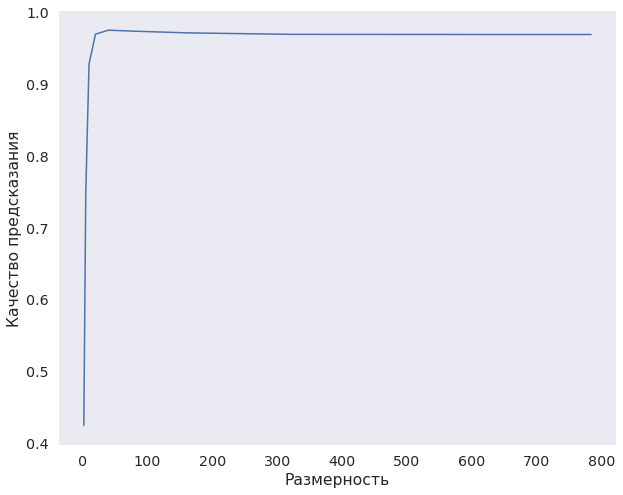

In [ ]:
# Отрисуем зависимость качества от числа компонент в PCA
plt.figure(figsize=(10,8))

plt.plot(dims, predicts_quality)

plt.rc('font', size=12)
plt.xlabel('Размерность')
plt.ylabel('Качество предсказания')
plt.grid()
plt.show()

In [ ]:
# Выведем число компонент при котором качество максимально и максимальное качество
print(f"Лучшее качество при {dims[np.argmax(predicts_quality)]} компонентах")
print(f"Максимальное качество = {np.max(predicts_quality)}")

Лучшее качество при 40 компонентах
Максимальное качество = 0.9748


Мы получили не большой прирост (но все же прирост), но даже он может уменьшать убытки компании на миллионы. Кроме того, другие алгоритмы могут иметь большую разницу в качестве и такие эксперименты предлагаются слушателю в качестве упражнения.

Кроме того, вы наверняка заметили разницу в скорости работы алгоритмов с разным числом признаков. Часто скорость работы является одним из важнейших пунктов выбора алгоритма и набора признаков.